<a href="https://colab.research.google.com/github/matekstatek/175IC-machine-learning/blob/main/neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [477]:
# ------------------------------------------------------
#                  BIBLIOTEKI
#-------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

import pandas as pd
import numpy as np

# ------------------------------------------------------
#                     FUNKCJE
#-------------------------------------------------------


# zmieniamy object na category
def to_category(df_raw):
    for key in df_raw.keys():
        if df_raw[key].dtype == "object":
            df_raw[key] = df_raw[key].astype("category")
    return df_raw

# przerzucamy target do osobnej zmiennej
def data_target_split(df):
    data = df.copy()
    target = data.pop('charges')

    return data, target

# normalizacja danych za pomocą jednego z narzędzi w sklearn
# wzór: new_x = (x - x.min) / (x.max - x.min)
# niestety nie ma mozliwosci wyciągnąć atrybutów z tego scalera, wobec czego
# gdy będziemy chcieli obliczyć 'charges' po normalizacji, będzie z tym problem.
# dlatego napiszemy własny scaler, gdzie będziemy wrzucać własną tablicę atrybutów.
# Będziemy mogli z nich skorzystać potem, przy odwracaniu 
def scale(df, min_max_scaler):  
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(df)
    min_max_scaler
    df = pd.DataFrame(x_scaled)

    return df

# normalizacja danych
# za pomocą wzoru
# new_x = (x - x.min) / (x.max - x.min)
# wchodzimy z wlasna tablica wartosc x.min, x.max
# jeśli obliczamy dla targetu, dajemy target=True
def custom_scale(df, normalize_tab=normalize_data_tab, target=False):
    # jeśli obliczamy dla data
    if target == False:
        # dla każdej kolumny którą należy normalizować
        for i, key in enumerate(['age', 'bmi', 'children']):
            # obliczamy znormalizowaną wartość zgodnie ze wzorem
            df[key] = (df[key] - normalize_tab[i*2+1]) / (normalize_tab[i*2] - normalize_tab[i*2+1])

    # jeśli obliczamy dla target     
    else:
        # obliczamy ze wzoru dla jednej kolumny
        df = (df - normalize_tab[1]) / (normalize_tab[0] - normalize_tab[1])
    
    return df

# jak będziemy chcieli wrócić z normalizacji do 
# zwykłych wartości to dajemy wzór:
# x = new_x * (max - min) + min
def normalized_to_real(x, normalize_tab=normalize_target_tab):
    return x* (normalize_tab[0]-normalize_tab[1]) + normalize_tab[1]

# ------------------------------------------------------
#                  MAIN (tak jakby)
#-------------------------------------------------------

df_raw = pd.read_csv("https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv")


print(df_raw[:10])

# kopia danych
df = df_raw.copy()

# zmieniamy object na category
df = to_category(df)

# zmieniamy na wartości liczbowe
df = pd.get_dummies(df, drop_first=True)

# dzielimy na dane wchodzące i wychodzące
data, target = data_target_split(df)

# tablice z wartosciami min i max poszczegolnych kolumn
# do customowej funkcji normalizacji
normalize_data_tab = np.array([data['age'].max(), data['age'].min(), 
                               data['bmi'].max(), data['bmi'].min(), 
                               data['children'].max(), data['children'].min()])
normalize_target_tab = np.array([target.max(), target.min()])

# # te 2 linijki, jesli korzystamy z narzedzia sklearn do normalizacji
# data = scale(np.array(data))   
# target = scale(np.array(target).reshape(-1,1))
# te 2 linijki, jesli korzystamy z wlasnej funkcji normalizacji
data = custom_scale(data)
target = custom_scale(target, normalize_target_tab, True)

# podział danych na train/test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

# budujemy model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(8,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model.summary()
# należy pokombinować również z optymalizatorami i loss (regression losses)
model.compile(optimizer='adam', loss='msle')
hist = model.fit(X_train, y_train, batch_size=10, epochs=50, validation_data=(X_test, y_test))


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692
X_train: (1070, 8)
y_train: (1070,)
X_test: (268, 8)
y_test: (268,)
Epoch 1/50
107/107 [==============================] - 1s 3ms/step - loss: 0.0706 - val_loss: 0.0333
Epoch 2/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0227 - val_loss: 0.0136
Epoch 3/50
107/107 [========

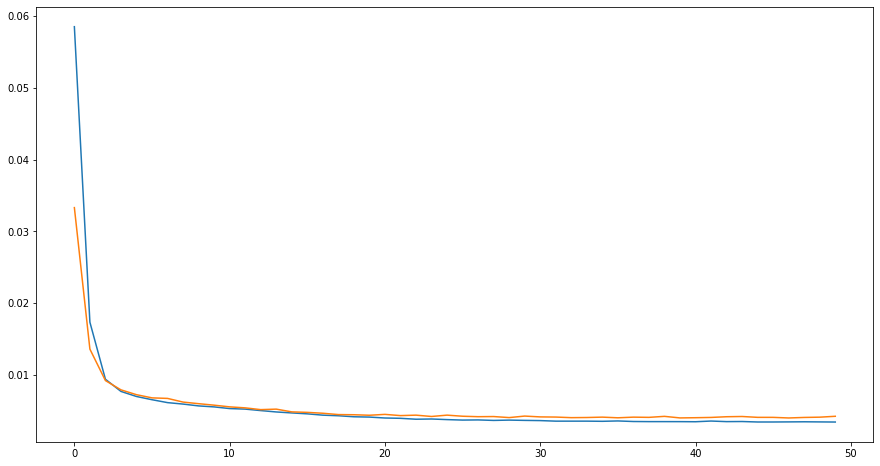

In [478]:
hist.history.keys()

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()


[]

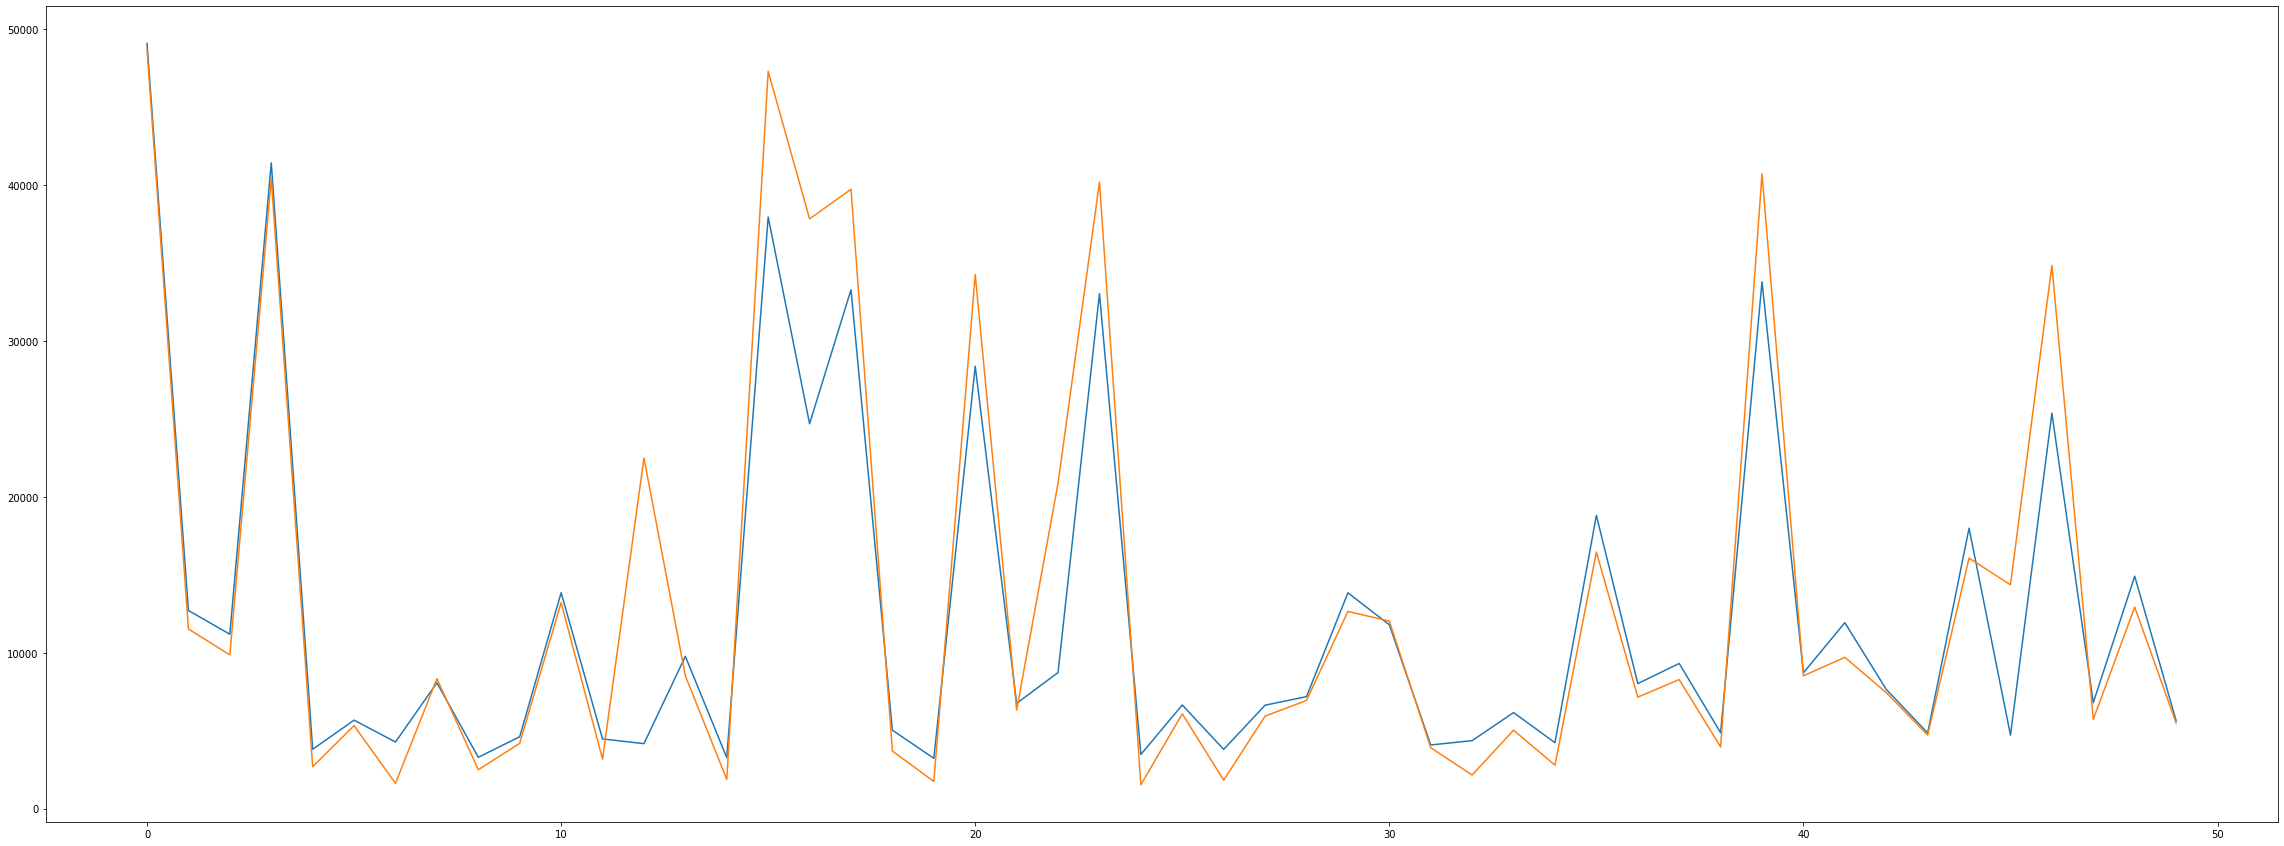

In [479]:
# porównamy, jak zgadywane są wartości vs jakie powinny być rzeczywiste
temp = []
temp2 = []
for i in range(50):
    temp.append(model.predict(X_test[i].reshape(1,-1))[0][0] * (normalize_target_tab[0]-normalize_target_tab[1]) + normalize_target_tab[1])

temp2 = y_test[:50] * (normalize_target_tab[0]-normalize_target_tab[1]) + normalize_target_tab[1]
plt.figure(figsize=(40,15))
plt.plot(temp)
plt.plot(temp2)
plt.plot()

In [480]:
# funkcja do sprawdzania wartości 'charges' dla listy - zawiera wszelkie potrzebne przekształcenia
def predict_charge(a):
    a = pd.DataFrame({'age':                pd.Series(a[0], dtype='int64'),
                    'bmi':                pd.Series(a[2], dtype='float64'),
                    'children':           pd.Series(a[3], dtype='int64'),
                    'sex_male':           pd.Series(1 if a[1] == 'male' else 0, dtype='uint8'),
                    'smoker_yes':         pd.Series(1 if a[4] == 'yes'  else 0, dtype='uint8'),
                    'region_northwest':   pd.Series(1 if a[5] == 'northwest' else 0, dtype='uint8'),
                    'region_southeast':   pd.Series(1 if a[5] == 'southeast' else 0, dtype='uint8'),
                    'region_southwest':   pd.Series(1 if a[1] == 'southwest' else 0, dtype='uint8')})
    a = custom_scale(a, normalize_data_tab)
    a = np.array(a)
    return (model.predict(a)[0][0] * (normalize_target_tab[0]-normalize_target_tab[1]) + normalize_target_tab[1])


predict_charge([37, 'male', 29.88, 2, 'no', 'northeast'])


7044.253713095259